In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Emrys\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Emrys\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\Emrys\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Project : Solar Panel Power Prediction

### Question 2
Our dataset is "solar power generation", a dataset about the power generated by solar panels with features related to the weather. Link : https://www.kaggle.com/datasets/vipulgote4/solar-power-generation

In [2]:
df = pd.read_csv('./ml_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

### Question 3

• Based on your intuition what are the most important variables for predicting your target variable ?:
- We think that the most important variables for predicting our target variable "Power generated" are : "Sky Cover", "Visibilty", "Is Daylight", "Distance to Solar Noon", "Month".



In [4]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

At first glance, the data appears to be almost clean. The column names are easy to understand. We just have one missing data item in one row for one column. We can therefore ignore this row by deleting it.

In [5]:
df = df[df['Average Wind Speed (Period)'].notna()]

In [6]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [7]:
df.head()

Day of Year  Year  Month  Day  First Hour of Period  Is Daylight  \
0          245  2008      9    1                     1        False   
1          245  2008      9    1                     4        False   
2          245  2008      9    1                     7         True   
3          245  2008      9    1                    10         True   
4          245  2008      9    1                    13         True   

   Distance to Solar Noon  Average Temperature (Day)  \
0                0.859897                         69   
1                0.628535                         69   
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
0                            28                       7.5          0   
1                            28                       7.5          0   
2                            28                       7.5          0   
3                            28                       7.5          0   
4                            28                       7.5          0   

   Visibility  Relative Humidity  Average Wind Speed (Period)  \
0        10.0                 75                          8.0   
1        10.0                 77                          5.0   
2        10.0                 70                          0.0   
3        10.0                 33                          0.0   
4        10.0                 21                          3.0   

   Average Barometric Pressure (Period)  Power Generated  
0                                 29.82                0  
1                                 29.85                0  
2                                 29.89             5418  
3                                 29.91            25477  
4                                 29.89            30069

In [8]:
df.describe().T

count         mean           std  \
Day of Year                           2919.0   183.282631    105.751253   
Year                                  2919.0  2008.665982      0.471727   
Month                                 2919.0     6.524495      3.448038   
Day                                   2919.0    15.715999      8.795825   
First Hour of Period                  2919.0    11.501542      6.875714   
Distance to Solar Noon                2919.0     0.503327      0.298069   
Average Temperature (Day)             2919.0    58.468996      6.842318   
Average Wind Direction (Day)          2919.0    24.957862      6.912203   
Average Wind Speed (Day)              2919.0    10.099486      4.837128   
Sky Cover                             2919.0     1.987667      1.412220   
Visibility                            2919.0     9.559609      1.380290   
Relative Humidity                     2919.0    73.505995     15.073974   
Average Wind Speed (Period)           2919.0    10.129154      7.261547   
Average Barometric Pressure (Period)  2919.0    30.017712      0.142006   
Power Generated                       2919.0  6982.182939  10313.330078   

                                              min          25%          50%  \
Day of Year                              1.000000    92.000000   183.000000   
Year                                  2008.000000  2008.000000  2009.000000   
Month                                    1.000000     4.000000     7.000000   
Day                                      1.000000     8.000000    16.000000   
First Hour of Period                     1.000000     5.500000    13.000000   
Distance to Solar Noon                   0.050401     0.232061     0.479241   
Average Temperature (Day)               42.000000    53.000000    59.000000   
Average Wind Direction (Day)             1.000000    25.000000    27.000000   
Average Wind Speed (Day)                 1.100000     6.600000    10.000000   
Sky Cover                                0.000000     1.000000     2.000000   
Visibility                               0.000000    10.000000    10.000000   
Relative Humidity                       14.000000    65.000000    77.000000   
Average Wind Speed (Period)              0.000000     5.000000     9.000000   
Average Barometric Pressure (Period)    29.480000    29.920000    30.000000   
Power Generated                          0.000000     0.000000   404.000000   

                                               75%           max  
Day of Year                             275.000000    366.000000  
Year                                   2009.000000   2009.000000  
Month                                    10.000000     12.000000  
Day                                      23.000000     31.000000  
First Hour of Period                     17.500000     22.000000  
Distance to Solar Noon                    0.739559      1.141361  
Average Temperature (Day)                63.000000     78.000000  
Average Wind Direction (Day)             29.000000     36.000000  
Average Wind Speed (Day)                 13.100000     26.600000  
Sky Cover                                 3.000000      4.000000  
Visibility                               10.000000     10.000000  
Relative Humidity                        84.000000    100.000000  
Average Wind Speed (Period)              15.000000     40.000000  
Average Barometric Pressure (Period)     30.110000     30.530000  
Power Generated                       12725.000000  36580.000000

### Part 1 : Data Cleaning


As can be seen from the table above, there are no outliers. However, if we look at the temperature column, the values seem high to be in degrees. We therefore need to convert the fahrenheit values to celsius degrees.

In [9]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5 / 9
df['Average Temperature (Day)'] = df['Average Temperature (Day)'].apply(fahrenheit_to_celsius)
df['Average Temperature (Day)'].describe()

count    2919.000000
mean       14.704998
std         3.801288
min         5.555556
25%        11.666667
50%        15.000000
75%        17.222222
max        25.555556
Name: Average Temperature (Day), dtype: float64

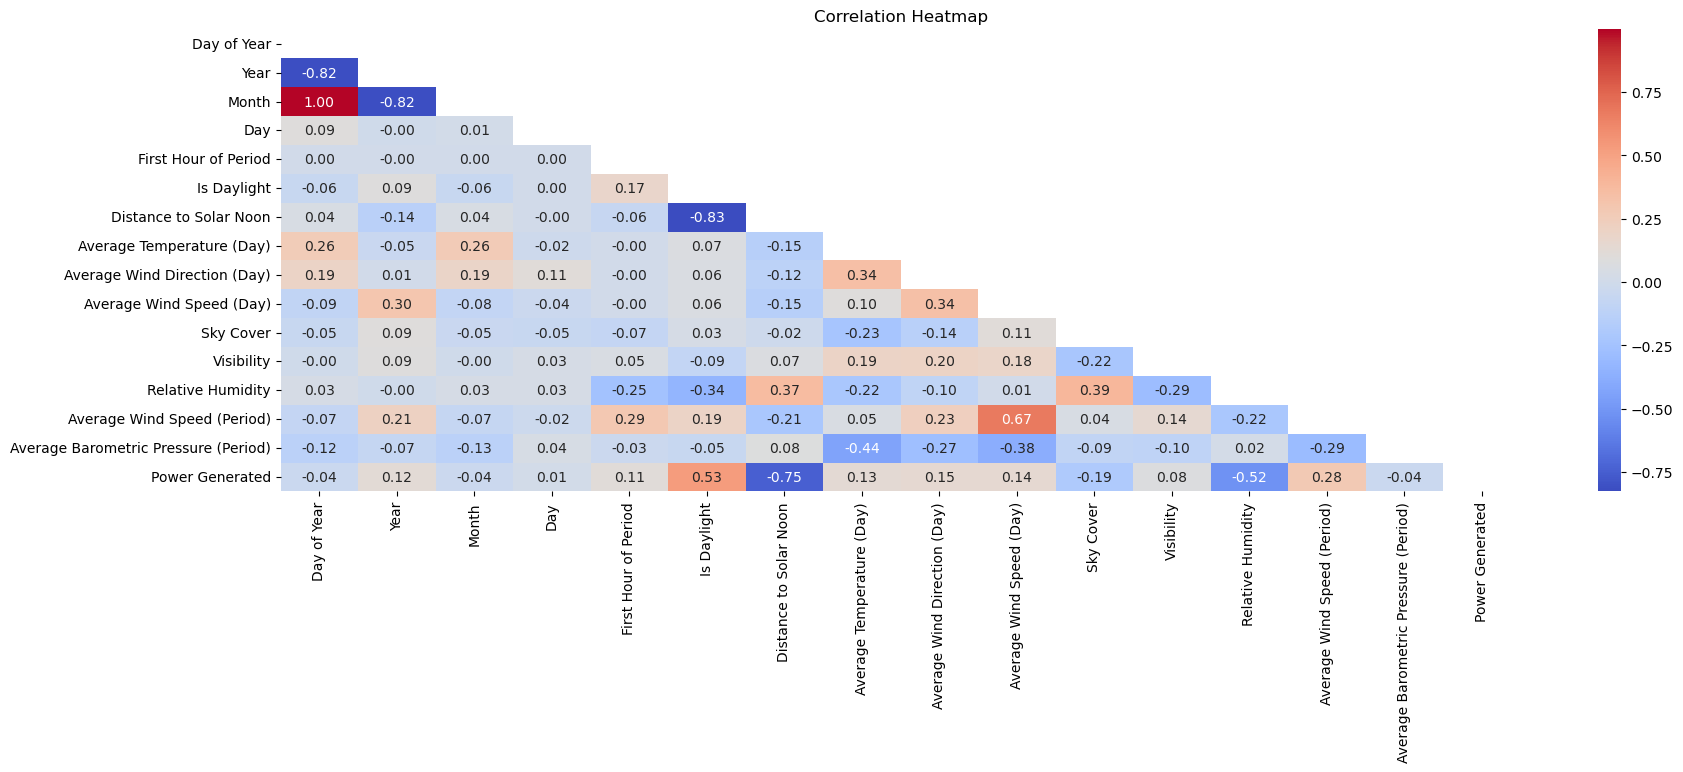

In [10]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

Following this Correlation Heatmap, we can see that two columns are very correlated, "Is Daylight" and "Distance to Solar Noon". According to us, "Is Daylight" values are to approximate, so we will drop "Is Daylight" columns.

In [11]:
df.drop(columns=['Is Daylight'], inplace=True)

In addition, "Distance to Solar Noon" seems, one again, to correlate with "Power Generated". But **"Power Generated"** is our **target** and "Distance to Solar Noon" could be significant for our study so we will keep both.

For the moment, based on the correlation matrix and the values we have, only the pressure column seems useless. So we intend to keep the others.

In [12]:
df.drop(columns=['Average Barometric Pressure (Period)'], inplace=True)

• Create visualisations that take into account the type of variable (categorical, numerical) that show
the correlation of the features you selected.

### Part 2 : Data Visualisation about our Dataset

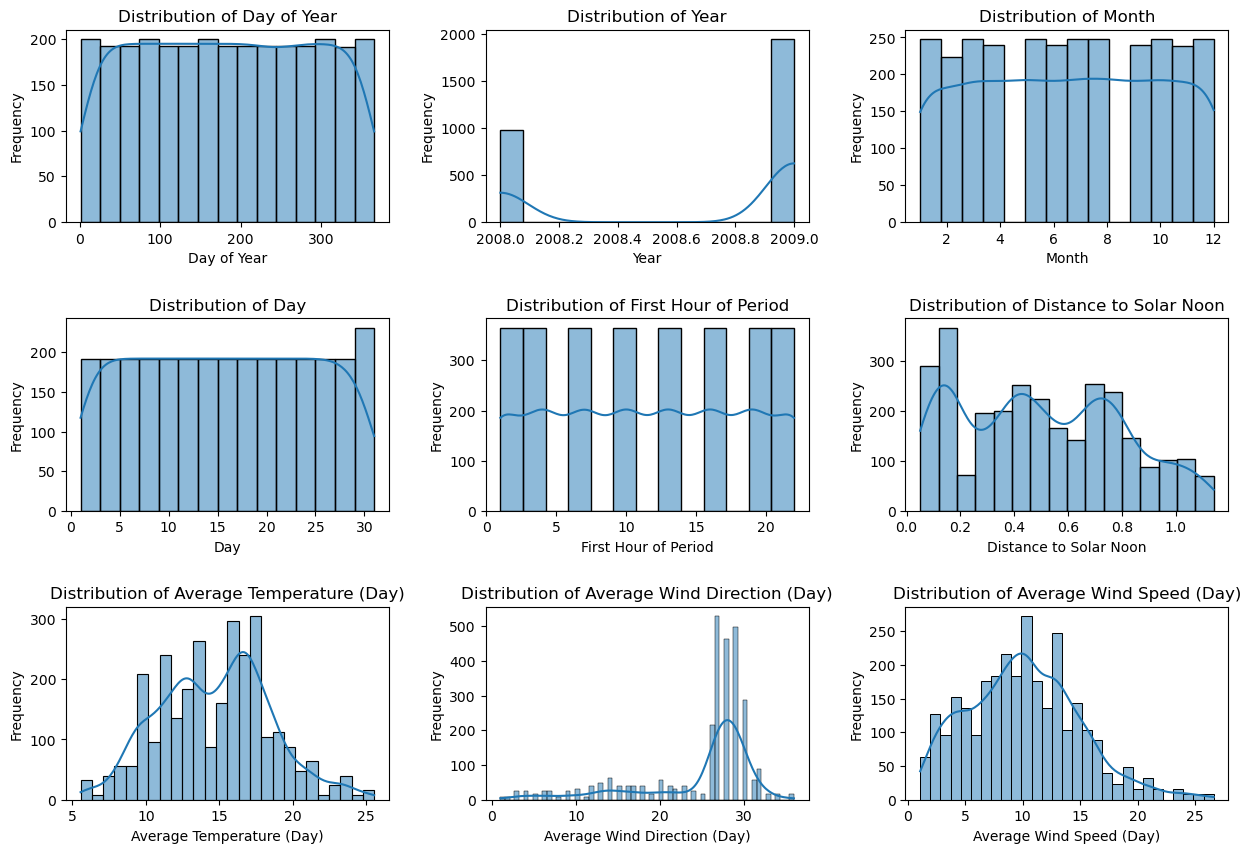

In [13]:
# Plotting the distribution of all main variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
cols = list(df.columns)

for col, ax in zip(cols, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

plt.show()

Each subplot shows the distribution of a single variable. We can see that some variables like 'Sky Cover' and 'Visibility' have a discrete distribution, indicating that they have a limited number of distinct values. Others, such as 'Relative Humidity' and 'Average Wind Speed (Period)', show a more continuous distribution.

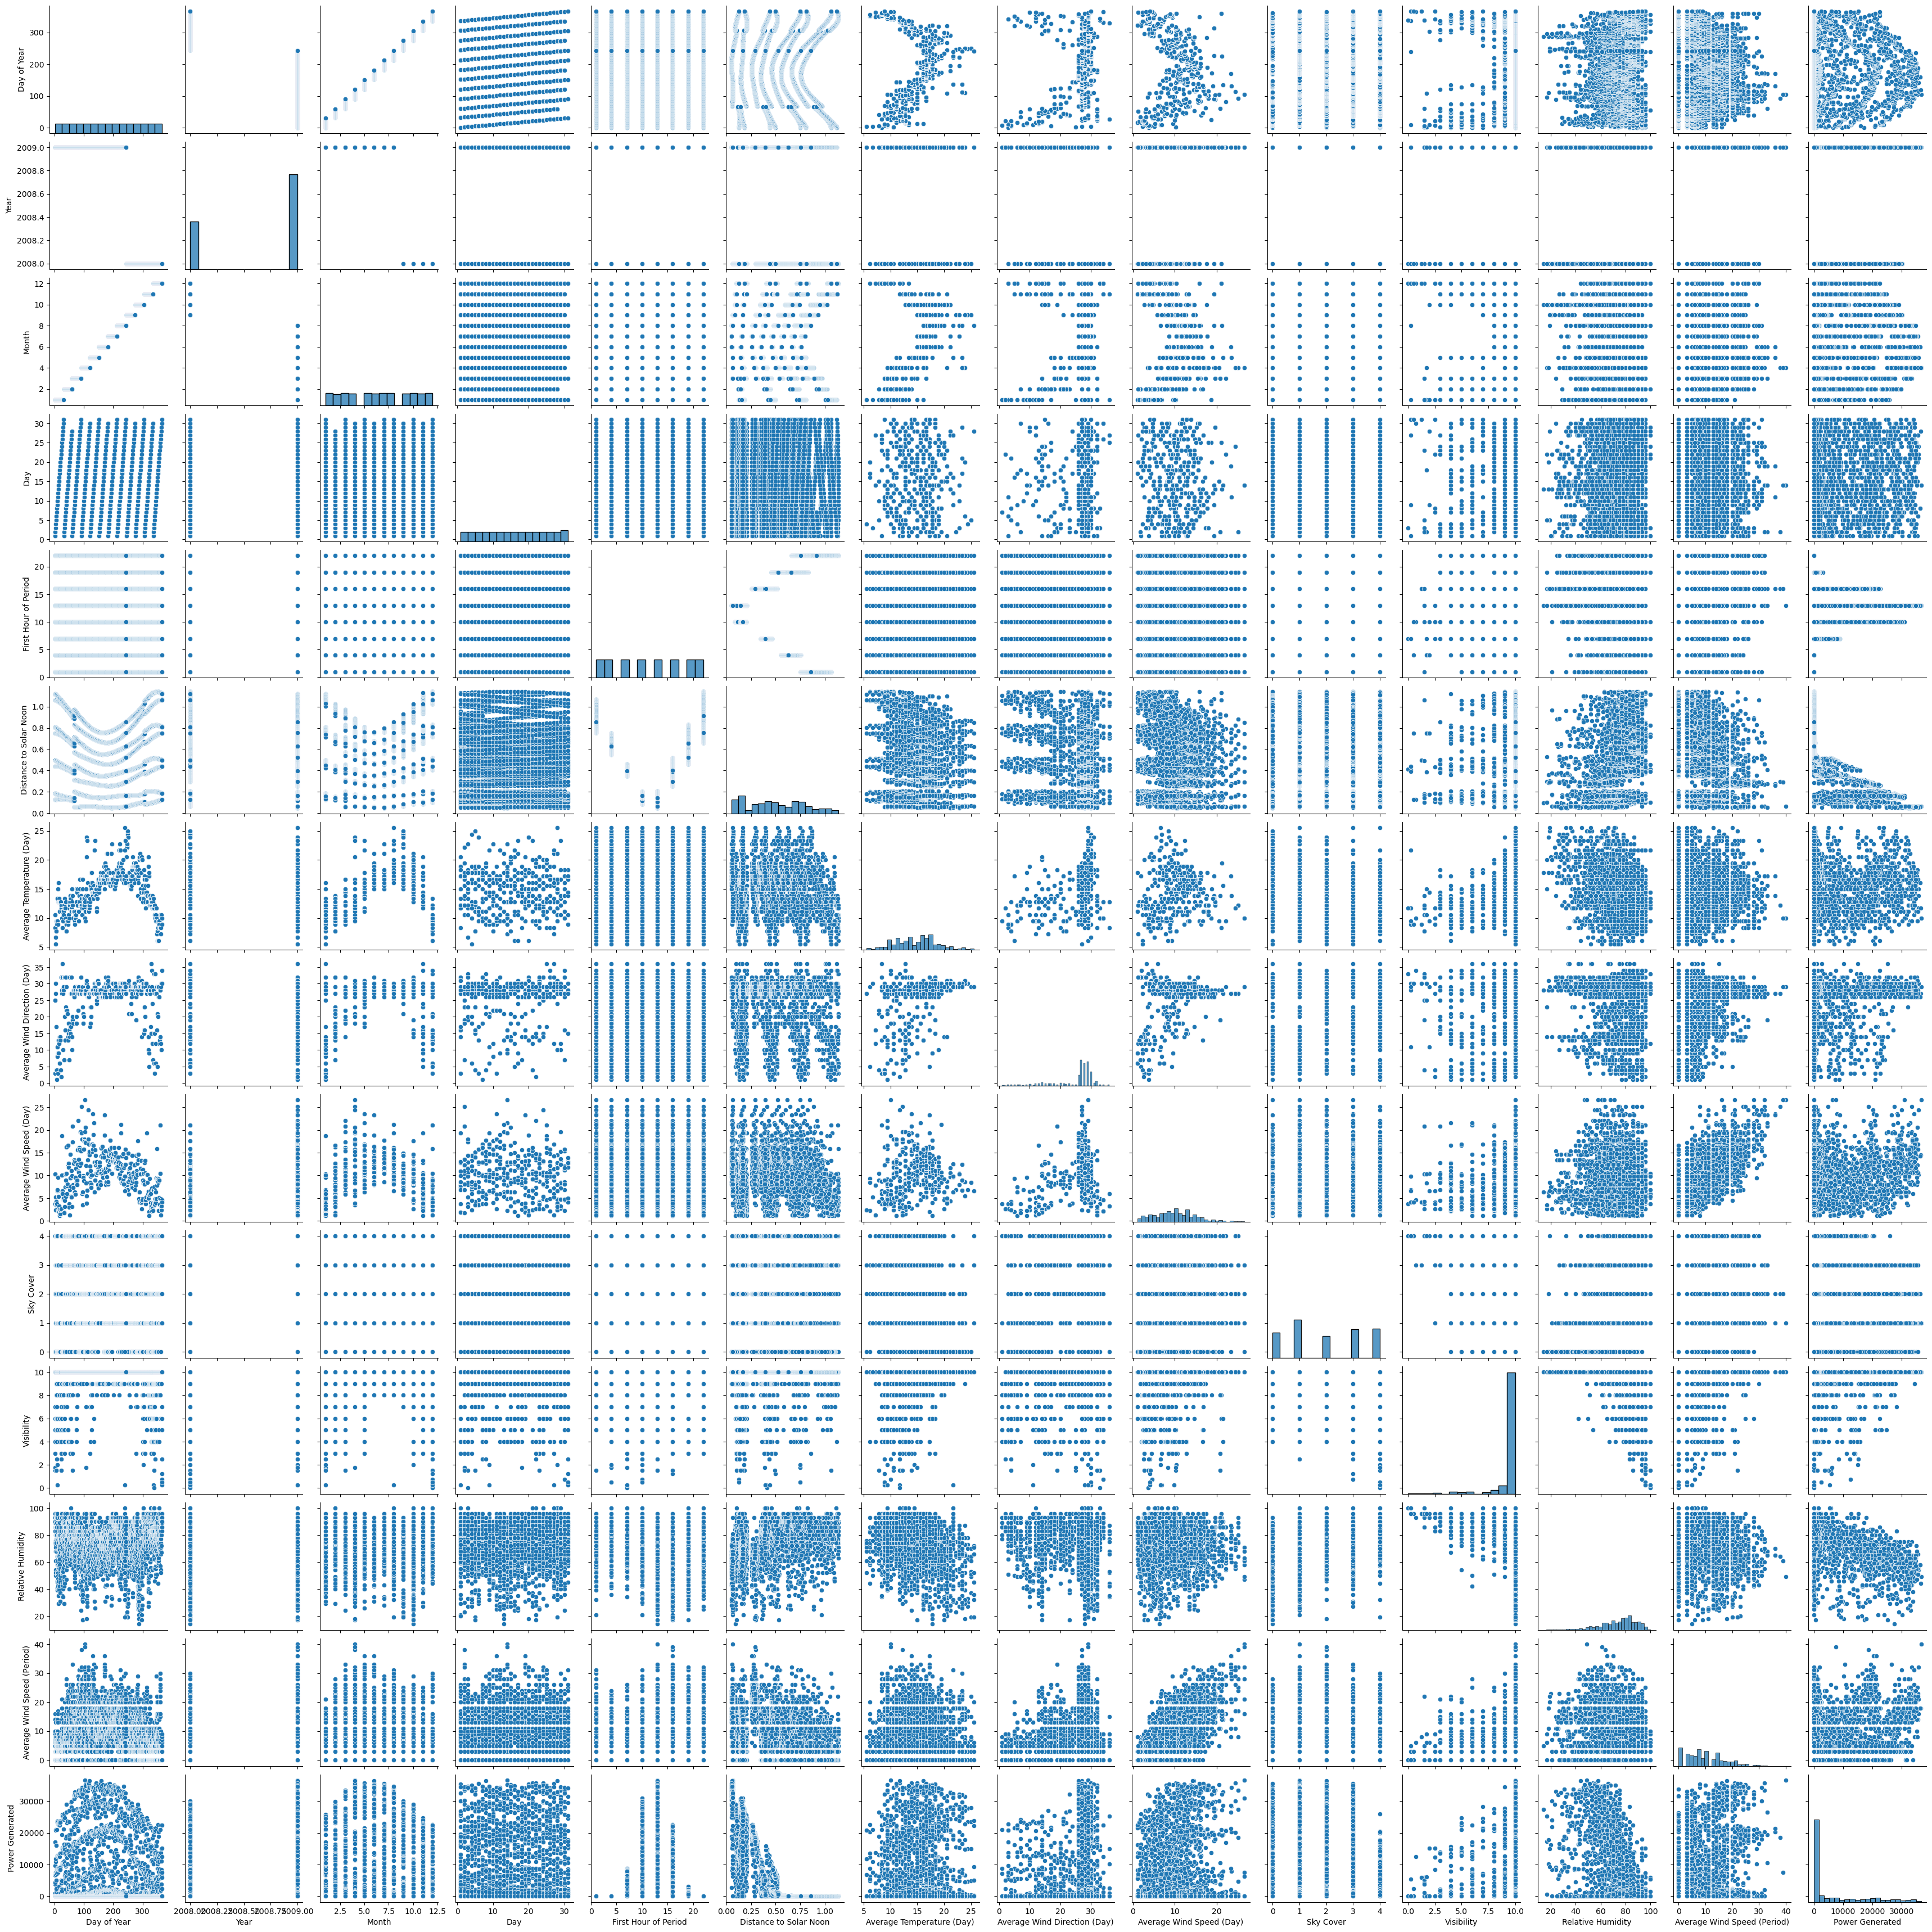

In [14]:
# Pairwise scatter plots
sns.pairplot(df[cols])
plt.show()

These plots are helpful to observe relationships between different variables. For example, there may be a visible correlation between variables like 'Distance to Solar Noon' and 'Power Generated', which would make sense if the power generation is solar-related. Variables such as 'Sky Cover' might also show an inverse relationship with 'Power Generated' due to the impact of cloud cover on solar power generation.

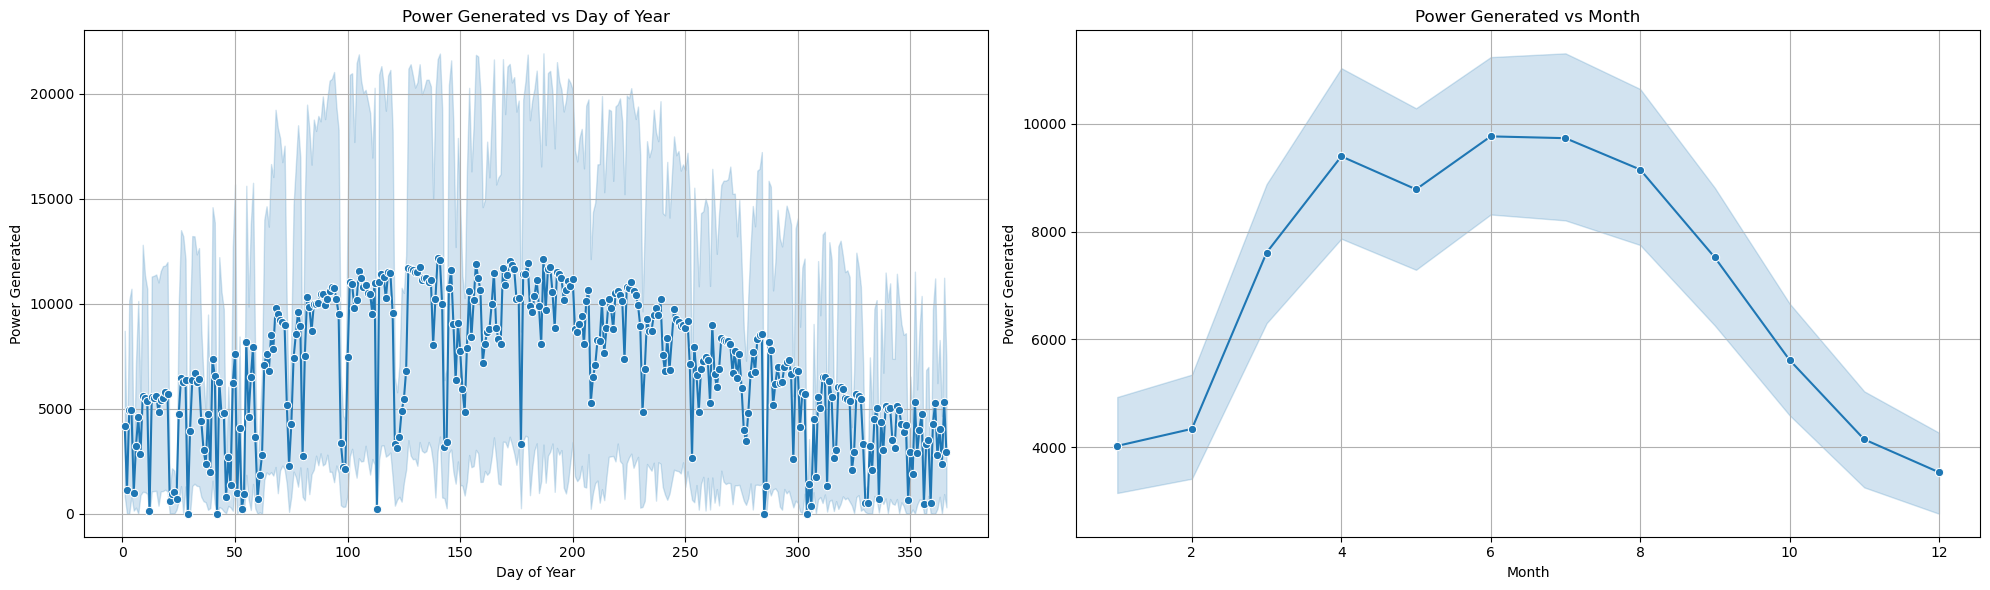

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

# Time series plot for 'Power Generated'
sns.lineplot(data=df, x='Day of Year', y='Power Generated', marker='o')
plt.title('Power Generated vs Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Power Generated')
plt.grid(True)

# Time series plot for 'Power Generated'
plt.subplot(1,2,2)
sns.lineplot(data=df, x='Month', y='Power Generated', marker='o')
plt.title('Power Generated vs Month')
plt.xlabel('Month')
plt.ylabel('Power Generated')
plt.grid(True)

plt.tight_layout()
plt.show()

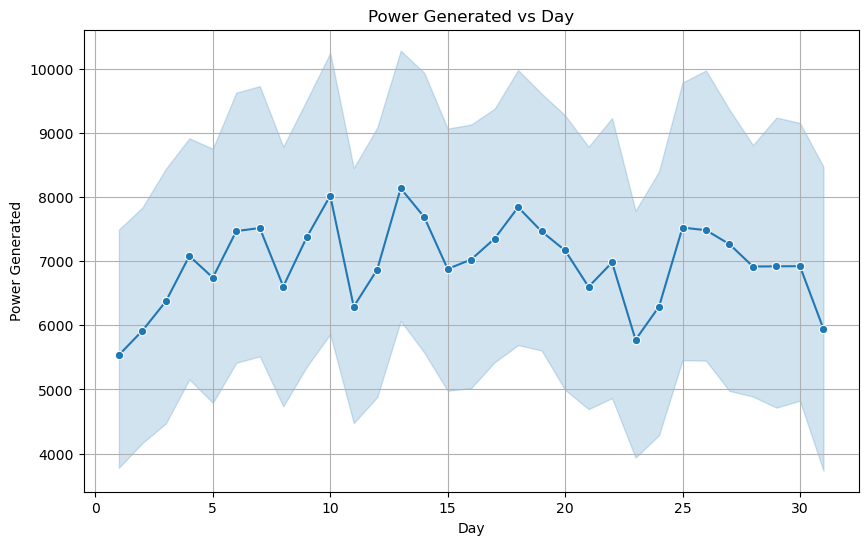

In [16]:
# Time series plot for 'Power Generated'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Day', y='Power Generated', marker='o')
plt.title('Power Generated vs Day')
plt.xlabel('Day')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

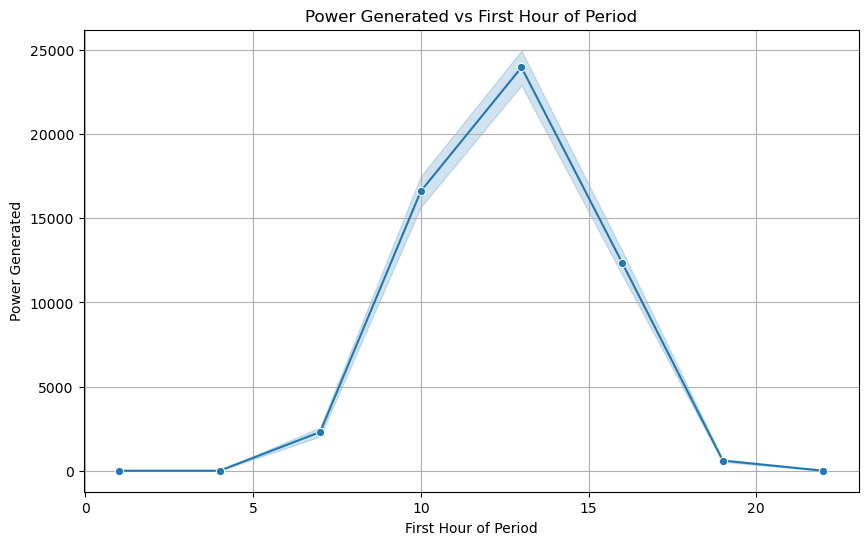

In [17]:
# Time series plot for 'Power Generated'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='First Hour of Period', y='Power Generated', marker='o')
plt.title('Power Generated vs First Hour of Period')
plt.xlabel('First Hour of Period')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

The plot indicates that power generation varies throughout the period, with some peaks that could correspond to specific hours of the day or external factors not visible in this plot. It appears that there's a cyclical pattern which could be daily, suggesting that power generation might be influenced by factors like sunlight hours if it's solar power generation we are looking at.

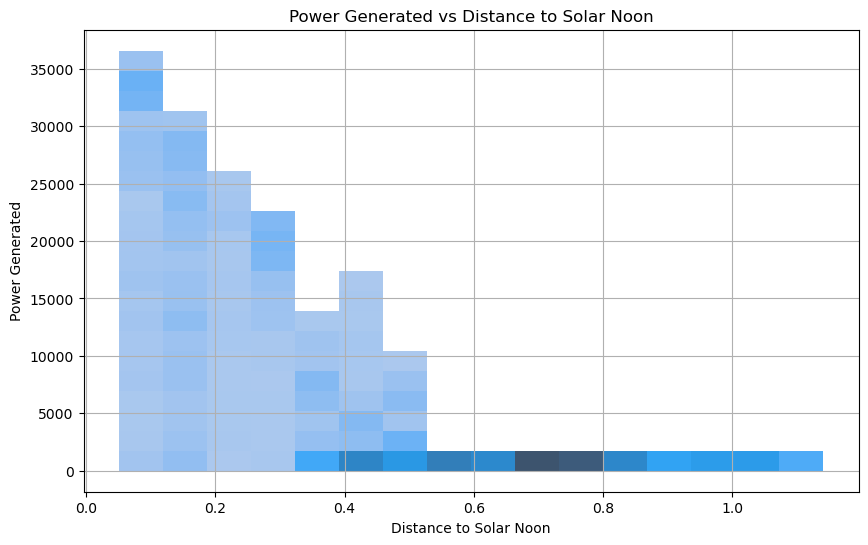

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Distance to Solar Noon', y='Power Generated')
plt.title('Power Generated vs Distance to Solar Noon')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

According to this graph, we can say that the smaller is the distance to solar noon, the bigger the power generated will be.

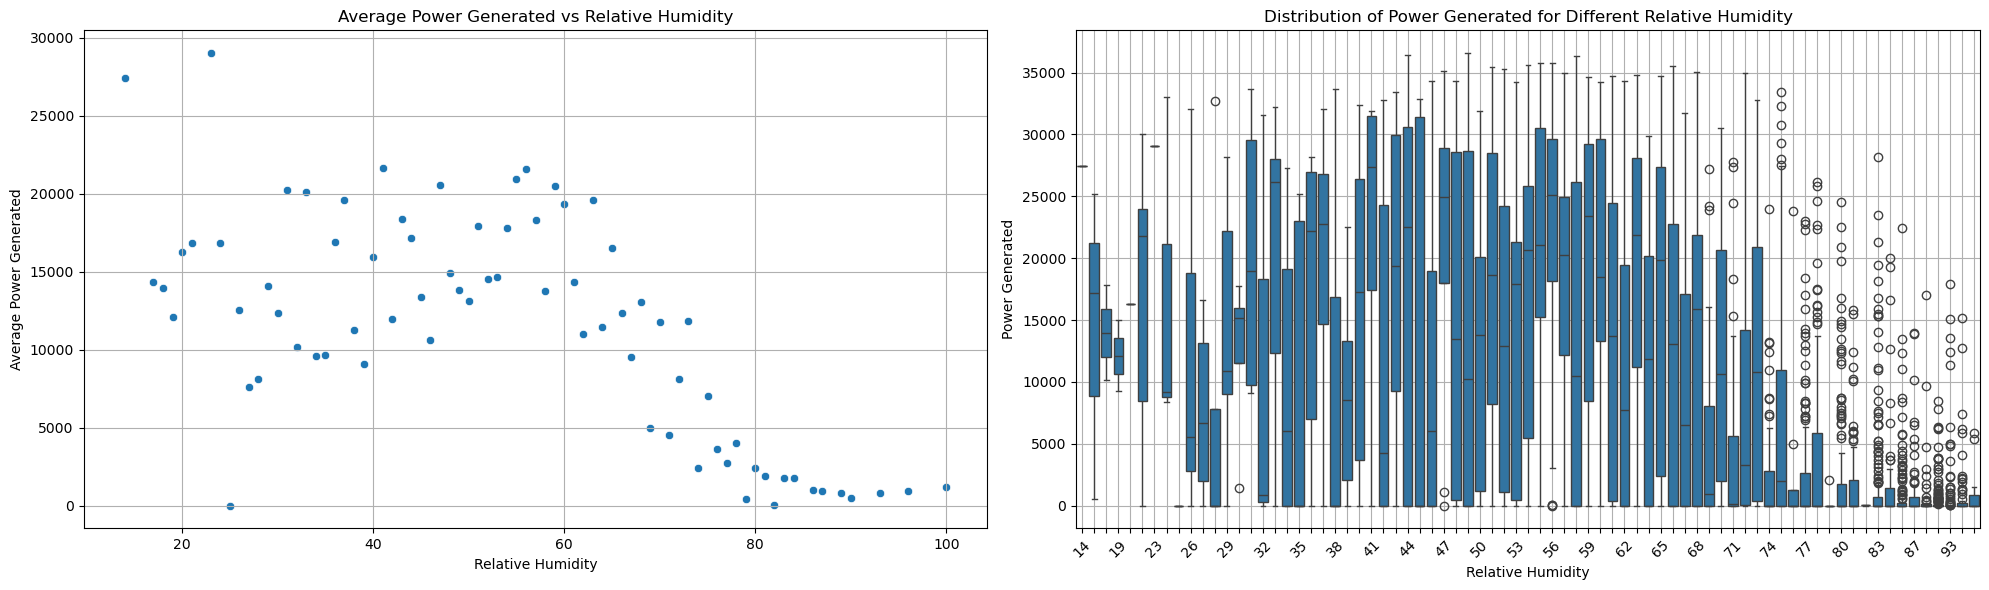

In [19]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Calcul des moyennes
mean_df = df.groupby('Relative Humidity', as_index=False)['Power Generated'].mean()
# Création d'un scatter plot avec les moyennes
sns.scatterplot(data=mean_df, x='Relative Humidity', y='Power Generated')
plt.title('Average Power Generated vs Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Average Power Generated')
plt.grid(True)
plt.subplot(1, 2, 2)
# Création d'un box plot
sns.boxplot(data=df, x='Relative Humidity', y='Power Generated')
plt.title('Distribution of Power Generated for Different Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Power Generated')
plt.grid(True)
plt.xticks(rotation=45) # Rotate labels for better readability
ax = plt.gca()  # Get current axis
labels = ax.get_xticklabels()  # Get all x labels

# Set every third label to visible, others to invisible
for i, label in enumerate(labels):
    if i % 3 != 0:
        label.set_visible(False)
plt.tight_layout()
plt.show()

Contrary to the previous graph, there doesn't seem to be much correlation between humidity and power generated. However, if the humidity is very high (>80%), then the power generated is low.

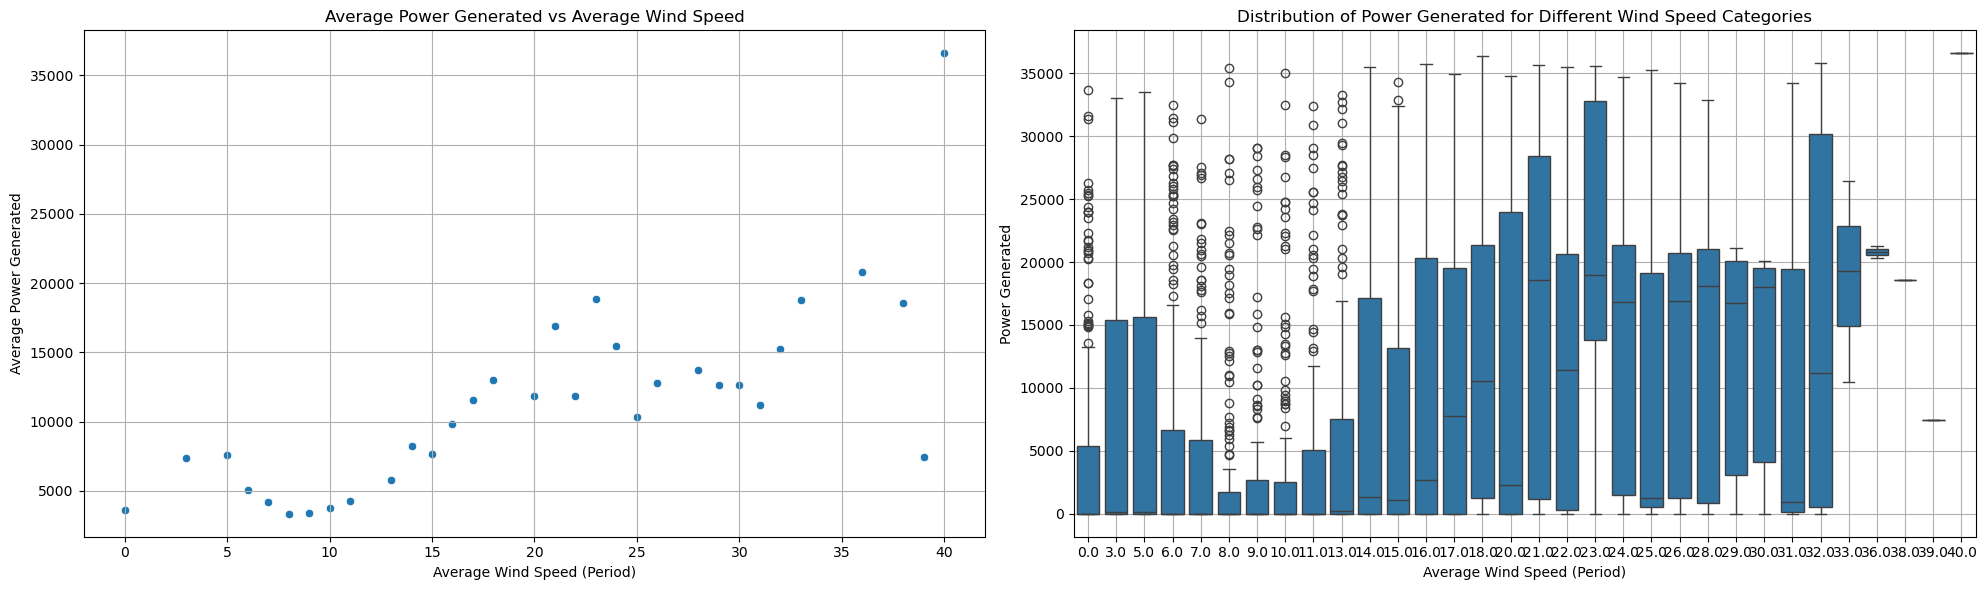

In [20]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Calcul des moyennes
mean_df = df.groupby('Average Wind Speed (Period)', as_index=False)['Power Generated'].mean()

# Création d'un scatter plot avec les moyennes
sns.scatterplot(data=mean_df, x='Average Wind Speed (Period)', y='Power Generated')
plt.title('Average Power Generated vs Average Wind Speed')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Average Power Generated')
plt.grid(True)
plt.subplot(1, 2, 2)
# Création d'un box plot
sns.boxplot(data=df, x='Average Wind Speed (Period)', y='Power Generated')
plt.title('Distribution of Power Generated for Different Wind Speed Categories')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Power Generated')
plt.grid(True)

plt.tight_layout()
plt.show()

At first glance, we can draw the same conclusions from this graph as from the previous one. However, we don't have enough data after 20/25 speeds. As a result, we can't conclude on a true correlation between wind speed and power generated.

## Question 4

# Part 3 : Modelling

In [21]:
df.head()

Day of Year  Year  Month  Day  First Hour of Period  \
0          245  2008      9    1                     1   
1          245  2008      9    1                     4   
2          245  2008      9    1                     7   
3          245  2008      9    1                    10   
4          245  2008      9    1                    13   

   Distance to Solar Noon  Average Temperature (Day)  \
0                0.859897                  20.555556   
1                0.628535                  20.555556   
2                0.397172                  20.555556   
3                0.165810                  20.555556   
4                0.065553                  20.555556   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
0                            28                       7.5          0   
1                            28                       7.5          0   
2                            28                       7.5          0   
3                            28                       7.5          0   
4                            28                       7.5          0   

   Visibility  Relative Humidity  Average Wind Speed (Period)  Power Generated  
0        10.0                 75                          8.0                0  
1        10.0                 77                          5.0                0  
2        10.0                 70                          0.0             5418  
3        10.0                 33                          0.0            25477  
4        10.0                 21                          3.0            30069

In [22]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Power Generated'])
y = df['Power Generated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [24]:
reg = LinearRegression()
models= reg.fit(X_train,  y_train)
print(models)


LinearRegression()


In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [26]:
y_pred = models.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse : {rmse}")
print(f"mae : {mean_absolute_error(y_test, y_pred)}")
print(f"r2 : {r2_score(y_test, y_pred)}")



rmse : 6443.24638751621
mae : 5097.404103220841
r2 : 0.6226405233366681


In [27]:
# Assuming you have already trained a linear regression model named 'reg'
coefficients = reg.coef_

print("Coefficients:")
for i in range(len(coefficients)):
    print( X.columns[i] ,":" , coefficients[i])

Coefficients:
Day of Year : 5498.59169606434
Year : 1386.3720062309928
Month : -4110.898207295269
Day : -424.06481451830473
First Hour of Period : -398.0869653320582
Distance to Solar Noon : -6546.407486062512
Average Temperature (Day) : -901.0566675105254
Average Wind Direction (Day) : 214.14036431946892
Average Wind Speed (Day) : -331.61506767288444
Sky Cover : -1393.2978757663916
Visibility : 55.93860471875964
Relative Humidity : -2538.0168097570513
Average Wind Speed (Period) : 1135.5132815360378


• Interpret the coefficients of your regression :
- The most significant positive values are "Day of Year", "Average Wind Speed (Period)". 
- The most significant negative values are "Month", "Distance to Solar Noon", "Sky Cover","Relative Humidity".

Positive coefficients:
"Day of Year" has a positive coefficient because later in the year tends to have higher solar radiation levels.
"Average Wind Speed" has a positive coefficient because more wind enhances cooling and ventilation effects.

Negative coefficients:
"Month" has a negative coefficient because its seasonal effects are already captured by "Day of Year".
"Distance to Solar Noon" has a negative coefficient because being further from solar noon means less direct sunlight.
"Sky Cover" has a negative coefficient because more cloud cover blocks sunlight from reaching the surface.
"Relative Humidity" has a negative coefficient because higher humidity reduces cooling effects from evaporation.

• Does any coefficient contradict your intuition? :
- At first we didn't think that the average wind speed could have an impact on the power generated. We had a little bit of a reflexion and our guess is that the wind pushes clouds.

### Question 5

We use LazyRegressor to test a lot of models and see which one is the best for our dataset. We can see that the best model is GradientBoostingRegressor. SO we choose it and the randomForestRegressor that we already know.

In [28]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

 21%|██▏       | 9/42 [00:01<00:04,  6.67it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [10:32<00:00, 15.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 2335, number of used features: 13
[LightGBM] [Info] Start training from score 6938.057816
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.93       0.93  2799.97   
HistGradientBoostingRegressor                0.92       0.93  2849.61   
GradientBoostingRegressor                    0.92       0.92  2956.39   
XGBRegressor                                 0.92       0.92  2971.59   
BaggingRegressor                             0.92       0.92  3019.39   
RandomForestRegressor                        0.91       0.92  3047.66   
ExtraTree

Now, we will try to improve our models with GridSearchCV, in order to find the best parameters

In [29]:
#grid search for gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [x for x in np.linspace(0.1, 1, 10)]
}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params_boosting = grid_search.best_params_
print(best_params_boosting)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'learning_rate': 0.1, 'max_depth': 150, 'max_features': 'sqrt', 'n_estimators': 100}


Now we have our best model with its best parameters.

In [30]:
gb = GradientBoostingRegressor(**best_params_boosting)
gb.fit(X_train, y_train)
y_pred_boosting = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_boosting)
rmse = np.sqrt(mse)
print(f"rmse {rmse}")
print(f"mae {mean_absolute_error(y_test, y_pred_boosting)}")
print(f"r2 {r2_score(y_test, y_pred_boosting)}")

rmse 3072.948031951459
mae 1460.061166617852
r2 0.9141666200356428


The r squared is very high with both of these models. The RMSE and MAE can seem quite high but this can be explained by the fact that the order of magnitude of our variable is large, so do the distances.

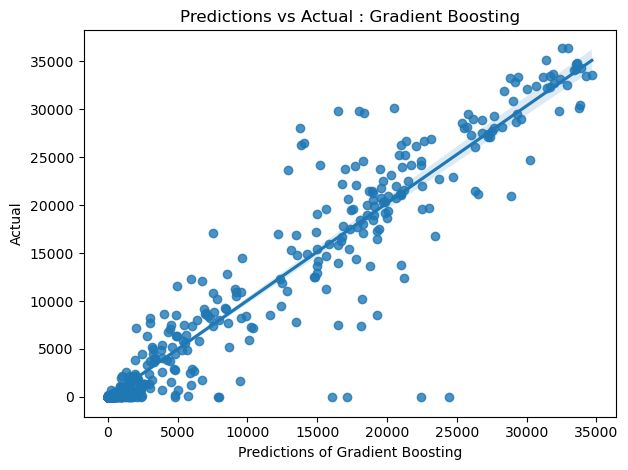

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.regplot(x=y_pred_boosting, y=y_test, fit_reg=True)
plt.xlabel("Predictions of Gradient Boosting")
plt.ylabel("Actual")
plt.title("Predictions vs Actual : Gradient Boosting")

plt.tight_layout()
plt.show()

### Question 6

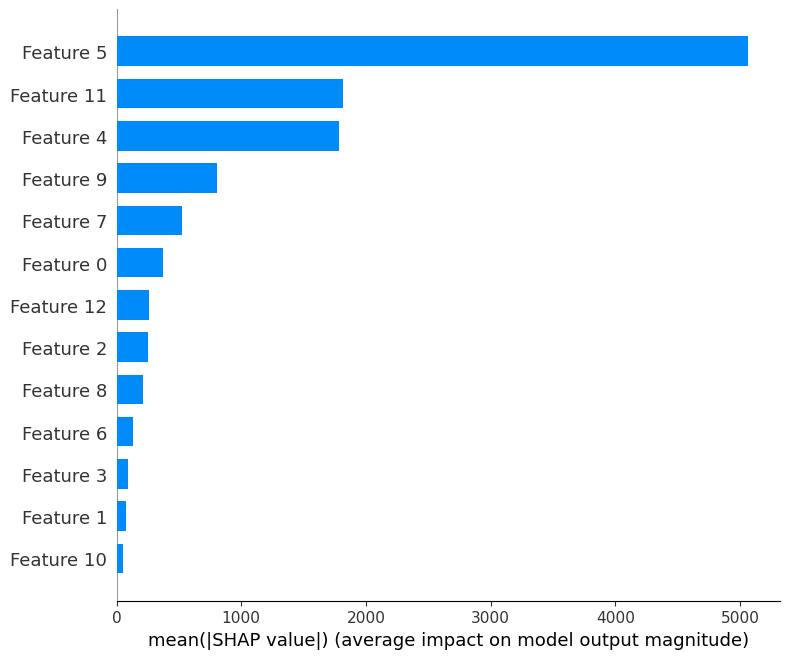

In [32]:
#features importances : shapley values
import shap

explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=X.columns)

In [85]:


# Create force plot
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])


In [33]:
from shap import TreeExplainer

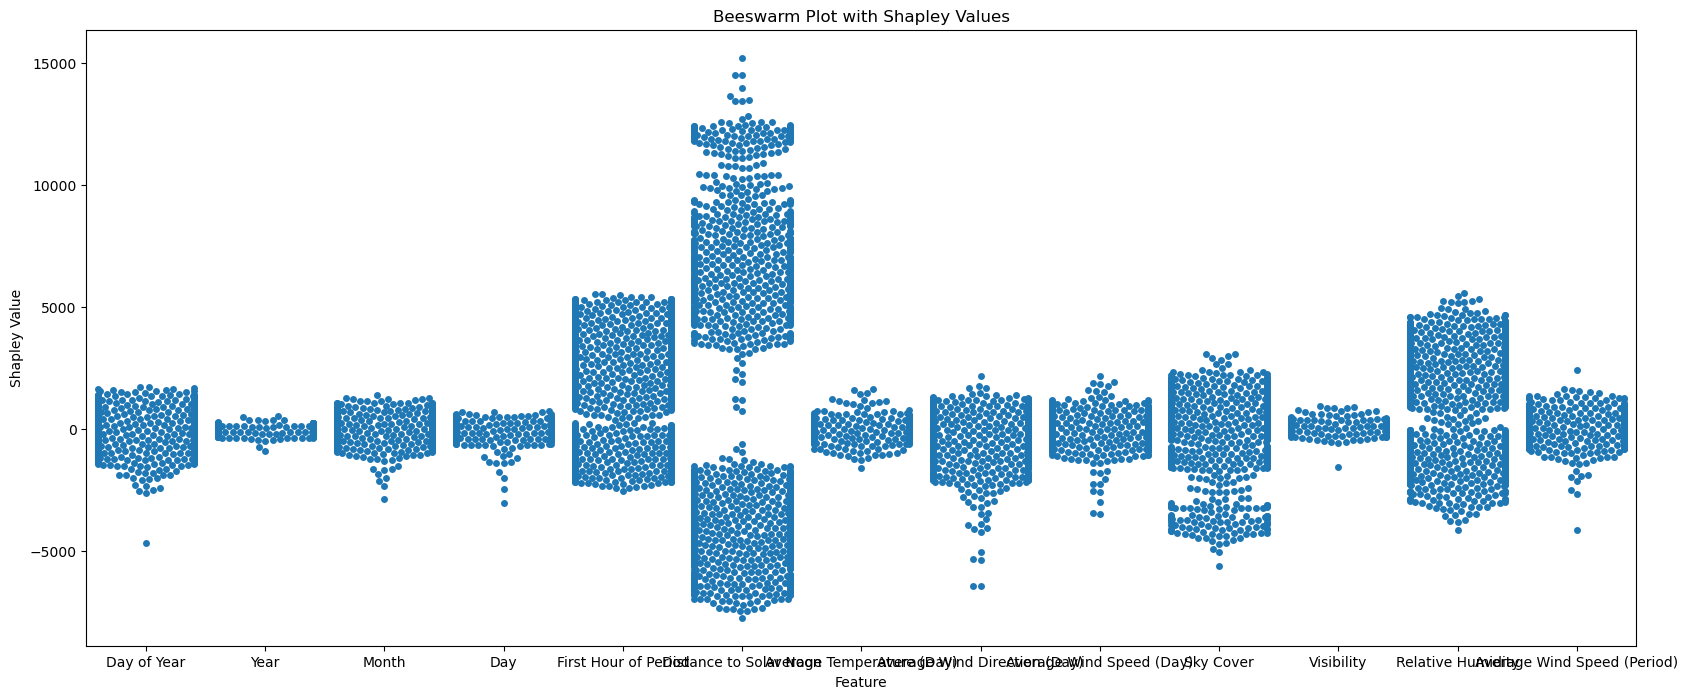

In [41]:
plt.figure(figsize=(20, 8))

shap_df = pd.DataFrame(data=shap_values, columns=X.columns)
shap_df = shap_df.melt(var_name='Feature', value_name='Shapley Value')
sns.swarmplot(data=shap_df, x='Feature', y='Shapley Value')
plt.xlabel('Feature')
plt.ylabel('Shapley Value')
plt.title('Beeswarm Plot with Shapley Values')
plt.show()

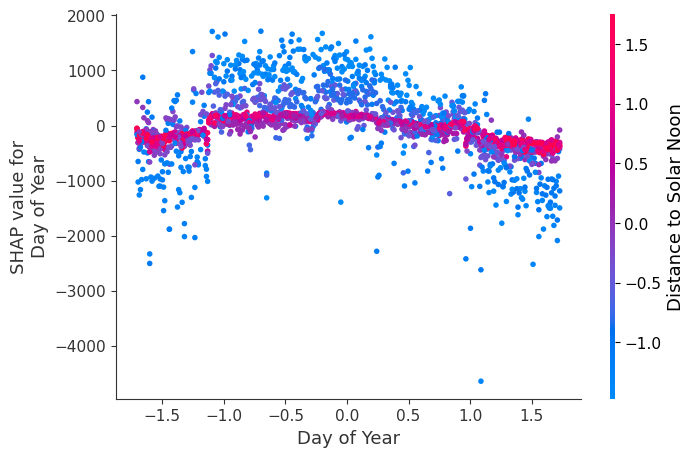

In [87]:


shap.dependence_plot('Day of Year', shap_values, X_train,feature_names=X.columns)


On both chart, distance to solar noon and first hour of period are the two most important variables in our models.
This is easily explained by the fact that the closer the sun is to the zenith, the more light there is, and solar panels produce electricity from light. Also, the first hour of period joue is relatively correlated with the first variable, as the sun is at its zenith within a few minutes.
then the high level of humidity can be explained by the formation of condensation on the solar panel, if the latter is strong, and thus alter the panel's operation. The sky cover also prevents light from passing through. These two variables are often synonymous with bad weather and precipitation.


### Question 7


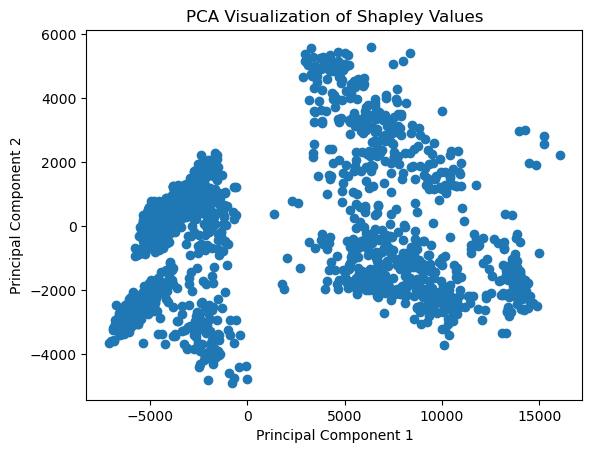

In [70]:
from sklearn.decomposition import PCA

# Perform PCA on the Shapley values
pca = PCA(n_components=2)
pca_values = pca.fit_transform(shap_values)

# Visualize the 2 principal axes
plt.scatter(pca_values[:, 0], pca_values[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Shapley Values')
plt.show()


In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  

In [72]:

clusters = kmeans.fit_predict(pca_values)

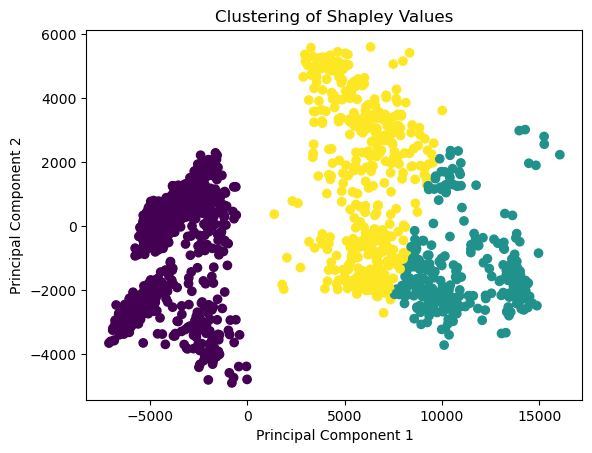

In [73]:
import matplotlib.pyplot as plt




plt.scatter(pca_values[:, 0], pca_values[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Shapley Values')
plt.show()

In [74]:



X_train['Cluster'] = clusters


cluster_characteristics = X_train.groupby('Cluster').mean()
print(cluster_characteristics)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices